In [1]:
import pandas as pd
import numpy as np

import os
import glob
from IPython.display import display, clear_output
from IPython.core.display import display, HTML

from tqdm.notebook import tqdm

#visualization
import matplotlib.pyplot as plt
import descartes
import geopandas
from shapely.geometry import Point, Polygon
from shapely import wkt
# pip install git+https://github.com/geopandas/geodatasets.git
import geodatasets
from geodatasets import get_path


# visualization version 2
import plotly.express as px
import plotly.graph_objects as go  
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


import geopy.distance


In [2]:
display(HTML("<style>.container { width:70% !important; }</style>"))
display(HTML("<style>.output_result { max-width:200% !important; }</style>"))
display(HTML("<style>.output_result { max-height:300% !important; }</style>"))

display(HTML("<style>.prompt { display:none !important; }</style>"))

In [2]:
Path = r"C:\Users\Samsung\Desktop\all\Project\23_VRPTW\Data\GiveFood"

In [3]:
fbank = pd.read_csv(Path +"\\foodbanks.csv")
locations = pd.read_json(Path + "\\locations.json")
needs = pd.read_json(Path + "\\needs.json")

# Data engineering

In [4]:
# eliminate useless cols

In [5]:
fb = fbank.copy()
fb = fb.drop(labels=["slug","phone","email","url","shopping_list_url","charity_register_url"],axis=1)

In [6]:
la_list,lng_list = [],[]
for i in range(len(fb)):
    lat_,lng_ = fb["latt_long"][i].split(",")
    la_list.append(lat_)
    lng_list.append(lng_)
fb["lat"] = la_list
fb["lng"] = lng_list
fb

name  \
0                     Medway   
1                     Himmah   
2                     Euston   
3    Northampton Hope Centre   
4                       Noor   
..                       ...   
890           East Yorkshire   
891                    Brent   
892               Chelmsford   
893                 Deepings   
894  Dons Local Action Group   

                                               address  postcode  \
0    Unit 19\r\nRiverside Estate\r\nSir Thomas Long...   ME2 4DP   
1    Unit 2 Forest Court\r\nGamble Street\r\nRadfor...   NG7 4EX   
2               28 Phoenix Road,\r\nLondon,\r\nNW1 1TA   NW1 1TA   
3    Oasis House\r\n35-37 Campbell Street\r\nNortha...   NN1 3DS   
4           Noor Hall\r\nNoor St\r\nPreston\r\nPR1 1QS   PR1 1QS   
..                                                 ...       ...   
890  Unit C Waltham House\r\nRiverview Road\r\nBeve...  HU17 8DY   
891  The Vestry Hall\r\nNeasden Lane\r\nLondon\r\nN...  NW10 2TS   
892               PO Box 9174\r\nChelmsford\r\nCM1 9AE   CM1 9AE   
893  63, Hereward Way\r\nDeeping St James\r\nPeterb...   PE6 8QB   
894  The Cherry Red Records Stadium\r\nPlough Lane\...  SW17 0NR   

         parliamentary_constituency               mp             mp_party  \
0              Rochester and Strood   Kelly Tolhurst         Conservative   
1                   Nottingham East   Nadia Whittome               Labour   
2            Holborn and St Pancras     Keir Starmer               Labour   
3                 Northampton South     Andrew Lewer         Conservative   
4                           Preston    Mark Hendrick  Labour Co-operative   
..                              ...              ...                  ...   
890         Beverley and Holderness    Graham Stuart         Conservative   
891                   Brent Central      Dawn Butler               Labour   
892                      Chelmsford       Vicky Ford         Conservative   
893  South Holland and The Deepings       John Hayes         Conservative   
894                       Wimbledon  Stephen Hammond         Conservative   

                                  ward                  district  country  \
0                         Strood Rural                    Medway  England   
1              Hyson Green & Arboretum                Nottingham  England   
2            St. Pancras & Somers Town                    Camden  England   
3                               Castle     West Northamptonshire  England   
4                        St. Matthew's                   Preston  England   
..                                 ...                       ...      ...   
890             Minster and Woodmansey  East Riding of Yorkshire  England   
891                          Roundwood                     Brent  England   
892  Chelmer Village and Beaulieu Park                Chelmsford  England   
893                  Deeping St. James            South Kesteven  England   
894                             Wandle                    Merton  England   

    charity_number  closed                       latt_long         network  \
0          1166505   False            51.3880636,0.5191694  Trussell Trust   
1          1161021   False            52.9587924,-1.165417            IFAN   
2          1172880   False           51.5303781,-0.1325498  Trussell Trust   
3          1015743   False  52.2424865,-0.8962770999999999            IFAN   
4              NaN   False           53.7657864,-2.6948046            IFAN   
..             ...     ...                             ...             ...   
890        1167071   False           53.8443251,-0.4003779  Trussell Trust   
891            NaN   False           51.5496339,-0.2492333  Trussell Trust   
892        1144804   False            51.7355868,0.4685497  Trussell Trust   
893            NaN   False           52.6718643,-0.2939364  Trussell Trust   
894        1154198   False    51.43153969999999,-0.1866871     Independent   

                   lat             

In [7]:
# locations

In [8]:
lo = locations.copy()
lo = lo.drop(labels = ["slug","phone","email","urls"],axis=1)
print(len(lo))
lo

1800


name  \
0                     Cottonmill   
1            Merton Growbaby Hub   
2                        Catford   
3                    Hope Valley   
4                Emmanuel Chapel   
...                          ...   
1795                Winn Gardens   
1796  Nether Edge/Abbeydale Road   
1797             Open Doors Cafe   
1798               Bethnal Green   
1799              Garvagh Mobile   

                                                address  postcode  \
0     Cottonmill Community & Cycling Centre\r\n12 Ol...   AL1 2EF   
1                  42 Graham Road\r\nMitcham\r\nCR4 2HA   CR4 2HA   
2     Salvation Army Catford\r\n23 - 25 Brownhill Ro...   SE6 2HE   
3     St Helen's Church,\r\n1 Main Rd,\r\nGrindlefor...   S32 2JN   
4     Satchfield Crescent\r\nHenbury\r\nBristol\r\nB...  BS10 7BN   
...                                                 ...       ...   
1795  Winn Gardens TARA Building\r\n126 Winn Drive\r...    S6 1UD   
1796  Common Ground Community Centre\r\nSt Peters Ha...    S7 1GR   
1797  Bicester Methodist Church\r\nBell Lane\r\nBice...  OX26 6JQ   
1798  Raine's Foundation School\r\nApproach Road\r\n...    E2 9LY   
1799      Bridge Street Car Park\r\nGarvagh\r\nBT51 5AF  BT51 5AF   

                            lat_lng  \
0             51.7384166,-0.3312981   
1      51.41041870000001,-0.1592729   
2              51.4460211,-0.017136   
3             53.2975772,-1.6323329   
4             51.5047201,-2.6203455   
...                             ...   
1795    53.38112899999999,-1.470085   
1796          53.3597155,-1.4816056   
1797          51.8992651,-1.1514797   
1798           51.531354,-0.0513275   
1799  54.9836398,-6.685834799999999   

                                               foodbank  \
0     {'name': 'St Albans and District', 'slug': 'st...   
1     {'name': 'Wimbledon', 'slug': 'wimbledon', 'ne...   
2     {'name': 'Lewisham', 'slug': 'lewisham', 'netw...   
3     {'name': 'Chesterfield', 'slug': 'chesterfield...   
4     {'name': 'Bristol North West', 'slug': 'bristo...   
...                                                 ...   
1795  {'name': 'Sheffield S6', 'slug': 'sheffield-s6...   
1796  {'name': 'Sheffield S6', 'slug': 'sheffield-s6...   
1797  {'name': 'Bicester', 'slug': 'bicester', 'netw...   
1798  {'name': 'Bow', 'slug': 'bow', 'network': 'Ind...   
1799  {'name': 'Causeway', 'slug': 'causeway', 'netw...   

                                               politics  
0     {'parliamentary_constituency': 'St Albans', 'm...  
1     {'parliamentary_constituency': 'Mitcham and Mo...  
2     {'parliamentary_constituency': 'Lewisham East'...  
3     {'parliamentary_constituency': 'Derbyshire Dal...  
4     {'parliamentary_constituency': 'Bristol North ...  
...                                                 ...  
1795  {'parliamentary_constituency': 'Sheffield, Bri...  
1796  {'parliamentary_constituency': 'Sheffield Cent...  
1797  {'parliamentary_constituency': 'Banbury', 'mp'...  
1798  {'parliamentary_constituency': 'Bethnal Green ...  
1799  {'parliamentary_constituency': 'East Londonder...  

[1800 rows x 6 columns]

In [9]:
lo["foodbank"][0]

{'name': 'St Albans and District',
 'slug': 'st-albans-and-district',
 'network': 'Trussell Trust',
 'urls': {'self': 'https://www.givefood.org.uk/api/2/foodbank/st-albans-and-district/',
  'html': 'https://www.givefood.org.uk/needs/at/st-albans-and-district/'}}

In [10]:
len(lo[lo["foodbank"].map(lambda x: len(x))!=4])

0

In [11]:
f_list,ne_list,la_list,lng_list = [],[],[],[]
for i in range(len(lo)):
    all_ = lo["foodbank"][i]
    f_name = all_["name"]
    network = all_["network"]
    lat_,long_ = lo["lat_lng"][i].split(",")
    
    la_list.append(lat_)
    lng_list.append(long_)
    f_list.append(f_name)
    ne_list.append(network)
lo["f_name"] = f_list
lo["network"] = ne_list
lo["lat"] = la_list
lo["lng"] = lng_list
lo = lo.drop(labels=["foodbank","lat_lng"],axis=1)

In [12]:
lo

name  \
0                     Cottonmill   
1            Merton Growbaby Hub   
2                        Catford   
3                    Hope Valley   
4                Emmanuel Chapel   
...                          ...   
1795                Winn Gardens   
1796  Nether Edge/Abbeydale Road   
1797             Open Doors Cafe   
1798               Bethnal Green   
1799              Garvagh Mobile   

                                                address  postcode  \
0     Cottonmill Community & Cycling Centre\r\n12 Ol...   AL1 2EF   
1                  42 Graham Road\r\nMitcham\r\nCR4 2HA   CR4 2HA   
2     Salvation Army Catford\r\n23 - 25 Brownhill Ro...   SE6 2HE   
3     St Helen's Church,\r\n1 Main Rd,\r\nGrindlefor...   S32 2JN   
4     Satchfield Crescent\r\nHenbury\r\nBristol\r\nB...  BS10 7BN   
...                                                 ...       ...   
1795  Winn Gardens TARA Building\r\n126 Winn Drive\r...    S6 1UD   
1796  Common Ground Community Centre\r\nSt Peters Ha...    S7 1GR   
1797  Bicester Methodist Church\r\nBell Lane\r\nBice...  OX26 6JQ   
1798  Raine's Foundation School\r\nApproach Road\r\n...    E2 9LY   
1799      Bridge Street Car Park\r\nGarvagh\r\nBT51 5AF  BT51 5AF   

                                               politics  \
0     {'parliamentary_constituency': 'St Albans', 'm...   
1     {'parliamentary_constituency': 'Mitcham and Mo...   
2     {'parliamentary_constituency': 'Lewisham East'...   
3     {'parliamentary_constituency': 'Derbyshire Dal...   
4     {'parliamentary_constituency': 'Bristol North ...   
...                                                 ...   
1795  {'parliamentary_constituency': 'Sheffield, Bri...   
1796  {'parliamentary_constituency': 'Sheffield Cent...   
1797  {'parliamentary_constituency': 'Banbury', 'mp'...   
1798  {'parliamentary_constituency': 'Bethnal Green ...   
1799  {'parliamentary_constituency': 'East Londonder...   

                      f_name         network                lat  \
0     St Albans and District  Trussell Trust         51.7384166   
1                  Wimbledon  Trussell Trust  51.41041870000001   
2                   Lewisham  Trussell Trust         51.4460211   
3               Chesterfield  Trussell Trust         53.2975772   
4         Bristol North West  Trussell Trust         51.5047201   
...                      ...             ...                ...   
1795            Sheffield S6  Trussell Trust  53.38112899999999   
1796            Sheffield S6  Trussell Trust         53.3597155   
1797                Bicester  Trussell Trust         51.8992651   
1798                     Bow     Independent          51.531354   
1799                Causeway  Trussell Trust         54.9836398   

                     lng  
0             -0.3312981  
1             -0.1592729  
2              -0.017136  
3             -1.6323329  
4             -2.6203455  
...                  ...  
1795           -1.470085  
1796          -1.4816056  
1797          -1.1514797  
1798          -0.0513275  
1799  -6.685834799999999  

[1800 rows x 8 columns]

In [13]:
# needs

In [14]:
need = needs.copy()
need = needs.drop(labels=["id","found","self"],axis=1)
need.head()

foodbank  \
0  {'name': 'Romsey', 'slug': 'romsey', 'urls': {...   
1  {'name': 'Brecon', 'slug': 'brecon', 'urls': {...   
2  {'name': 'Farnborough', 'slug': 'farnborough',...   
3  {'name': 'Wimbledon', 'slug': 'wimbledon', 'ur...   
4  {'name': 'Farnborough', 'slug': 'farnborough',...   

                                               needs  \
0  Meat - Not Corned Beef\nLong Life Fruit Juice\...   
1  Instant Mash\nTins Of Soup & Cup-a-soups\nNood...   
2  1 Litre Cartons Breakfast Juice\nSmall Tins Of...   
3  Treats (Crisps, Chocolates / Haribo's / Boiled...   
4  1 Litre Cartons Breakfast Juice\nSmall Tins Of...   

                                              excess  
0  Porridge Oats\nCorned Beef\nPasta\nCereal\nBak...  
1  Corned Beef\n500g & 1kg Dried Pasta\nRed Kidne...  
2  Tinned Soup\nBaked Beans\nTomatoes\nPasta\nTea...  
3                                              Pasta  
4  Tinned Soup\nBaked Beans\nTomatoes\nPasta\nTea...

In [15]:
need["foodbank"][0]

{'name': 'Romsey',
 'slug': 'romsey',
 'urls': {'self': 'https://www.givefood.org.uk/api/2/foodbank/romsey/',
  'html': 'https://www.givefood.org.uk/needs/at/romsey/'}}

In [16]:
len(need[need["foodbank"].map(lambda x: len(x))!=3])

0

In [17]:
fb_list = []
needs_list = []
excess_list = []
for i in range(len(need)):
    fb_list.append(need["foodbank"][i]["name"])
    needs_list.append(need["needs"][i].split('\n'))
    excess_list.append(need["excess"][i].split("\n"))
need["f_name"] = fb_list
need["needs"] = needs_list
need["excess"] = excess_list
need = need.drop(labels="foodbank",axis=1)
need.head()

needs  \
0  [Meat - Not Corned Beef, Long Life Fruit Juice...   
1  [Instant Mash, Tins Of Soup & Cup-a-soups, Noo...   
2  [1 Litre Cartons Breakfast Juice, Small Tins O...   
3  [Treats (Crisps, Chocolates / Haribo's / Boile...   
4  [1 Litre Cartons Breakfast Juice, Small Tins O...   

                                              excess       f_name  
0  [Porridge Oats, Corned Beef, Pasta, Cereal, Ba...       Romsey  
1  [Corned Beef, 500g & 1kg Dried Pasta, Red Kidn...       Brecon  
2  [Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...  Farnborough  
3                                            [Pasta]    Wimbledon  
4  [Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...  Farnborough

# Data merging

- foodbank.csv, locations.json, needs.json

In [18]:
fb

name  \
0                     Medway   
1                     Himmah   
2                     Euston   
3    Northampton Hope Centre   
4                       Noor   
..                       ...   
890           East Yorkshire   
891                    Brent   
892               Chelmsford   
893                 Deepings   
894  Dons Local Action Group   

                                               address  postcode  \
0    Unit 19\r\nRiverside Estate\r\nSir Thomas Long...   ME2 4DP   
1    Unit 2 Forest Court\r\nGamble Street\r\nRadfor...   NG7 4EX   
2               28 Phoenix Road,\r\nLondon,\r\nNW1 1TA   NW1 1TA   
3    Oasis House\r\n35-37 Campbell Street\r\nNortha...   NN1 3DS   
4           Noor Hall\r\nNoor St\r\nPreston\r\nPR1 1QS   PR1 1QS   
..                                                 ...       ...   
890  Unit C Waltham House\r\nRiverview Road\r\nBeve...  HU17 8DY   
891  The Vestry Hall\r\nNeasden Lane\r\nLondon\r\nN...  NW10 2TS   
892               PO Box 9174\r\nChelmsford\r\nCM1 9AE   CM1 9AE   
893  63, Hereward Way\r\nDeeping St James\r\nPeterb...   PE6 8QB   
894  The Cherry Red Records Stadium\r\nPlough Lane\...  SW17 0NR   

         parliamentary_constituency               mp             mp_party  \
0              Rochester and Strood   Kelly Tolhurst         Conservative   
1                   Nottingham East   Nadia Whittome               Labour   
2            Holborn and St Pancras     Keir Starmer               Labour   
3                 Northampton South     Andrew Lewer         Conservative   
4                           Preston    Mark Hendrick  Labour Co-operative   
..                              ...              ...                  ...   
890         Beverley and Holderness    Graham Stuart         Conservative   
891                   Brent Central      Dawn Butler               Labour   
892                      Chelmsford       Vicky Ford         Conservative   
893  South Holland and The Deepings       John Hayes         Conservative   
894                       Wimbledon  Stephen Hammond         Conservative   

                                  ward                  district  country  \
0                         Strood Rural                    Medway  England   
1              Hyson Green & Arboretum                Nottingham  England   
2            St. Pancras & Somers Town                    Camden  England   
3                               Castle     West Northamptonshire  England   
4                        St. Matthew's                   Preston  England   
..                                 ...                       ...      ...   
890             Minster and Woodmansey  East Riding of Yorkshire  England   
891                          Roundwood                     Brent  England   
892  Chelmer Village and Beaulieu Park                Chelmsford  England   
893                  Deeping St. James            South Kesteven  England   
894                             Wandle                    Merton  England   

    charity_number  closed                       latt_long         network  \
0          1166505   False            51.3880636,0.5191694  Trussell Trust   
1          1161021   False            52.9587924,-1.165417            IFAN   
2          1172880   False           51.5303781,-0.1325498  Trussell Trust   
3          1015743   False  52.2424865,-0.8962770999999999            IFAN   
4              NaN   False           53.7657864,-2.6948046            IFAN   
..             ...     ...                             ...             ...   
890        1167071   False           53.8443251,-0.4003779  Trussell Trust   
891            NaN   False           51.5496339,-0.2492333  Trussell Trust   
892        1144804   False            51.7355868,0.4685497  Trussell Trust   
893            NaN   False           52.6718643,-0.2939364  Trussell Trust   
894        1154198   False    51.43153969999999,-0.1866871     Independent   

                   lat             

In [19]:
lo

name  \
0                     Cottonmill   
1            Merton Growbaby Hub   
2                        Catford   
3                    Hope Valley   
4                Emmanuel Chapel   
...                          ...   
1795                Winn Gardens   
1796  Nether Edge/Abbeydale Road   
1797             Open Doors Cafe   
1798               Bethnal Green   
1799              Garvagh Mobile   

                                                address  postcode  \
0     Cottonmill Community & Cycling Centre\r\n12 Ol...   AL1 2EF   
1                  42 Graham Road\r\nMitcham\r\nCR4 2HA   CR4 2HA   
2     Salvation Army Catford\r\n23 - 25 Brownhill Ro...   SE6 2HE   
3     St Helen's Church,\r\n1 Main Rd,\r\nGrindlefor...   S32 2JN   
4     Satchfield Crescent\r\nHenbury\r\nBristol\r\nB...  BS10 7BN   
...                                                 ...       ...   
1795  Winn Gardens TARA Building\r\n126 Winn Drive\r...    S6 1UD   
1796  Common Ground Community Centre\r\nSt Peters Ha...    S7 1GR   
1797  Bicester Methodist Church\r\nBell Lane\r\nBice...  OX26 6JQ   
1798  Raine's Foundation School\r\nApproach Road\r\n...    E2 9LY   
1799      Bridge Street Car Park\r\nGarvagh\r\nBT51 5AF  BT51 5AF   

                                               politics  \
0     {'parliamentary_constituency': 'St Albans', 'm...   
1     {'parliamentary_constituency': 'Mitcham and Mo...   
2     {'parliamentary_constituency': 'Lewisham East'...   
3     {'parliamentary_constituency': 'Derbyshire Dal...   
4     {'parliamentary_constituency': 'Bristol North ...   
...                                                 ...   
1795  {'parliamentary_constituency': 'Sheffield, Bri...   
1796  {'parliamentary_constituency': 'Sheffield Cent...   
1797  {'parliamentary_constituency': 'Banbury', 'mp'...   
1798  {'parliamentary_constituency': 'Bethnal Green ...   
1799  {'parliamentary_constituency': 'East Londonder...   

                      f_name         network                lat  \
0     St Albans and District  Trussell Trust         51.7384166   
1                  Wimbledon  Trussell Trust  51.41041870000001   
2                   Lewisham  Trussell Trust         51.4460211   
3               Chesterfield  Trussell Trust         53.2975772   
4         Bristol North West  Trussell Trust         51.5047201   
...                      ...             ...                ...   
1795            Sheffield S6  Trussell Trust  53.38112899999999   
1796            Sheffield S6  Trussell Trust         53.3597155   
1797                Bicester  Trussell Trust         51.8992651   
1798                     Bow     Independent          51.531354   
1799                Causeway  Trussell Trust         54.9836398   

                     lng  
0             -0.3312981  
1             -0.1592729  
2              -0.017136  
3             -1.6323329  
4             -2.6203455  
...                  ...  
1795           -1.470085  
1796          -1.4816056  
1797          -1.1514797  
1798          -0.0513275  
1799  -6.685834799999999  

[1800 rows x 8 columns]

In [20]:
need

needs  \
0   [Meat - Not Corned Beef, Long Life Fruit Juice...   
1   [Instant Mash, Tins Of Soup & Cup-a-soups, Noo...   
2   [1 Litre Cartons Breakfast Juice, Small Tins O...   
3   [Treats (Crisps, Chocolates / Haribo's / Boile...   
4   [1 Litre Cartons Breakfast Juice, Small Tins O...   
..                                                ...   
95  [Tinned Soup, Rice Pudding, Jams / Spreads, Ti...   
96  [Fray Bentos Pies, Tinned Potatoes, Cooking Oi...   
97  [Tinned Meats (Stewed Steak In Gravy, Minced B...   
98  [Bottles Of Squash, Tinned Peas, Carrots, Swee...   
99  [Pasta Sauce/ Pesto, Tinned Or Instant Potatoe...   

                                               excess            f_name  
0   [Porridge Oats, Corned Beef, Pasta, Cereal, Ba...            Romsey  
1   [Corned Beef, 500g & 1kg Dried Pasta, Red Kidn...            Brecon  
2   [Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...       Farnborough  
3                                             [Pasta]         Wimbledon  
4   [Tinned Soup, Baked Beans, Tomatoes, Pasta, Te...       Farnborough  
..                                                ...               ...  
95                              [Pasta, Rice, Cereal]             Brent  
96                               [Pasta, Cereal, Tea]   Stroud District  
97  [Baked Beans, Tinned Spaghetti, Milk Substitut...        Callington  
98                                                 []             Grace  
99  [Baked Beans, Soup, Cereal, Tea, Nappies - Exc...  Walton & Hersham  

[100 rows x 3 columns]

# Visuallization

In [21]:
fb.head()

name                                            address  \
0                   Medway  Unit 19\r\nRiverside Estate\r\nSir Thomas Long...   
1                   Himmah  Unit 2 Forest Court\r\nGamble Street\r\nRadfor...   
2                   Euston             28 Phoenix Road,\r\nLondon,\r\nNW1 1TA   
3  Northampton Hope Centre  Oasis House\r\n35-37 Campbell Street\r\nNortha...   
4                     Noor         Noor Hall\r\nNoor St\r\nPreston\r\nPR1 1QS   

  postcode parliamentary_constituency              mp             mp_party  \
0  ME2 4DP       Rochester and Strood  Kelly Tolhurst         Conservative   
1  NG7 4EX            Nottingham East  Nadia Whittome               Labour   
2  NW1 1TA     Holborn and St Pancras    Keir Starmer               Labour   
3  NN1 3DS          Northampton South    Andrew Lewer         Conservative   
4  PR1 1QS                    Preston   Mark Hendrick  Labour Co-operative   

                        ward               district  country charity_number  \
0               Strood Rural                 Medway  England        1166505   
1    Hyson Green & Arboretum             Nottingham  England        1161021   
2  St. Pancras & Somers Town                 Camden  England        1172880   
3                     Castle  West Northamptonshire  England        1015743   
4              St. Matthew's                Preston  England            NaN   

   closed                       latt_long         network         lat  \
0   False            51.3880636,0.5191694  Trussell Trust  51.3880636   
1   False            52.9587924,-1.165417            IFAN  52.9587924   
2   False           51.5303781,-0.1325498  Trussell Trust  51.5303781   
3   False  52.2424865,-0.8962770999999999            IFAN  52.2424865   
4   False           53.7657864,-2.6948046            IFAN  53.7657864   

                   lng  
0            0.5191694  
1            -1.165417  
2           -0.1325498  
3  -0.8962770999999999  
4           -2.6948046

In [40]:
lo.head()

name                                            address  \
0           Cottonmill  Cottonmill Community & Cycling Centre\r\n12 Ol...   
1  Merton Growbaby Hub               42 Graham Road\r\nMitcham\r\nCR4 2HA   
2              Catford  Salvation Army Catford\r\n23 - 25 Brownhill Ro...   
3          Hope Valley  St Helen's Church,\r\n1 Main Rd,\r\nGrindlefor...   
4      Emmanuel Chapel  Satchfield Crescent\r\nHenbury\r\nBristol\r\nB...   

   postcode                                           politics  \
0   AL1 2EF  {'parliamentary_constituency': 'St Albans', 'm...   
1   CR4 2HA  {'parliamentary_constituency': 'Mitcham and Mo...   
2   SE6 2HE  {'parliamentary_constituency': 'Lewisham East'...   
3   S32 2JN  {'parliamentary_constituency': 'Derbyshire Dal...   
4  BS10 7BN  {'parliamentary_constituency': 'Bristol North ...   

                   f_name         network                lat         lng  
0  St Albans and District  Trussell Trust         51.7384166  -0.3312981  
1               Wimbledon  Trussell Trust  51.41041870000001  -0.1592729  
2                Lewisham  Trussell Trust         51.4460211   -0.017136  
3            Chesterfield  Trussell Trust         53.2975772  -1.6323329  
4      Bristol North West  Trussell Trust         51.5047201  -2.6203455

In [23]:
#fig = px.scatter_geo(fb, lat = 'lat', lon = 'lng', color = 'name',scope="uk")
geolocator = Nominatim(user_agent="covid_datacrayon.com")

In [71]:
tar_fb = fb.copy()
tar_lo = lo.copy()
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_fb["lng"],
        lat=tar_fb["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "Food Bank",
        text=tar_fb["name"],
        marker=dict(
            size= 9,
            color="rgb(200,0,0)",
            line_color="rgb(122,0,0)",
            line_width=0.5,
            sizemode="area",
        ),
    )
)

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_lo["lng"],
        lat=tar_lo["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "location",
        text=tar_lo["name"],
        marker=dict(
            size=5,
            color="rgb(0,0,200)",
            line_color="rgb(0,0,122)",
            line_width=0.2,
            sizemode="area",

        ),
    )
)



fig.update_layout(
    width = 1500,
    height = 1500,
    geo=dict(
        resolution=50,
        scope="europe",
        center={
            "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
            "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
        },
        projection=go.layout.geo.Projection(
            type="azimuthal equal area", scale=8
        ),
        landcolor="rgb(217, 217, 217)",
        showocean=True,
    )
)


### only Trussell Trust

In [73]:
tar_fb = fb[fb["network"]=="Trussell Trust"]
tar_lo = lo[lo["network"]=="Trussell Trust"]

fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_fb["lng"],
        lat=tar_fb["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "Food Bank",
        text=tar_fb["name"],
        marker=dict(
            size= 9,
            color="rgb(200,0,0)",
            line_color="rgb(122,0,0)",
            line_width=0.5,
            sizemode="area",
        ),
    )
)

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_lo["lng"],
        lat=tar_lo["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "location",
        text=tar_lo["name"],
        marker=dict(
            size=5,
            color="rgb(0,0,200)",
            line_color="rgb(0,0,122)",
            line_width=0.2,
            sizemode="area",

        ),
    )
)



fig.update_layout(
    width = 1500,
    height = 1500,
    geo=dict(
        resolution=50,
        scope="europe",
        center={
            "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
            "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
        },
        projection=go.layout.geo.Projection(
            type="azimuthal equal area", scale=8
        ),
        landcolor="rgb(217, 217, 217)",
        showocean=True,
    )
)

# Draw lines between locations and a food bank

In [419]:
def Add_scatter(lngs,lats):
    fig.add_trace(go.Scattergeo(
    
            lon=lngs,
            lat=lats,
            #lon=fb["lon1"],
            #lat=fb["lat1"],
            mode="lines",
            line = dict(width = 0.5, color = 'black'))
    )

In [420]:
lo["f_name"].value_counts()

Salvation Army           608
Durham                    27
Black Country             23
Coventry                  16
Stoke-on-Trent            16
                        ... 
Burngreave                 1
Windermere & District      1
Tamworth                   1
Oldham                     1
Rushden and Higham         1
Name: f_name, Length: 291, dtype: int64

## Considering all network types with consideration of salvation army

In [421]:
tar_fb = fb.copy()
tar_lo = lo.copy()
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_fb["lng"],
        lat=tar_fb["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "Food Bank",
        text=tar_fb["name"],
        marker=dict(
            size= 9,
            color="rgb(200,0,0)",
            line_color="rgb(122,0,0)",
            line_width=0.5,
            sizemode="area",
        ),
    )
)

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_lo["lng"],
        lat=tar_lo["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "location",
        text=tar_lo["name"],
        marker=dict(
            size=5,
            color="rgb(0,0,200)",
            line_color="rgb(0,0,122)",
            line_width=0.2,
            sizemode="area",

        ),
    )
)





tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:

    print(test_fb)
    point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
    lo_list = tar_lo[tar_lo["f_name"]==test_fb]
    lo_list = lo_list.reset_index(drop=True)

    for i in range(len(lo_list)):
        lngs = [point_fb.lng[0],lo_list["lng"][i]]
        lats = [point_fb.lat[0],lo_list["lat"][i]]
        Add_scatter(lngs,lats)

Aberdeen North
Shoreham
Hackney
West Berks
East Renfrewshire
Yiewsley & West Drayton
Gateshead
Warwick District
Brent
Burgess Hill
3food4u
North Belfast
Aston & Nechells
Central Southwark Community Hub
Epping Forest
North Norfolk
Dagenham
Wells Vineyard
Blaenau Gwent
Durham
Aylesbury
Weston-super-Mare
Northern Devon
Knowsley
Tameside South & Longdendale
Arden
Chelwood Foodbank Plus
Exeter
Wirral
Vale
Newark
Chichester District
Anglesey
Atherton & Leigh
South Ayrshire
Fylde
Lowestoft
Lincoln
Washington Community
Malmesbury & District
Bournemouth
Highland
Ledbury
St Austell
St Neots
Mustard Tree
Antrim
Abergele District
South Normanton Area
Glenrothes
Norwich
Cardiff
Leeds South & East
Banbury
Lutterworth and Villages
Hillingdon
Walton & Hersham
Perth and Kinross
Swindon
Gravesham
Uttlesford
Shepway
Chesterfield
Windermere & District
Caithness
Harrogate District
Newcastle West End
Deal Area
Basingstoke
Fareham & Gosport Basics Bank
Liskeard & Looe
Nuneaton
Rhondda
Bromley Borough
Redbrid

In [422]:
fig.update_layout(
    width = 1500,
    height = 1500,
    geo=dict(
        resolution=50,
        scope="europe",
        center={
            "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
            "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
        },
        projection=go.layout.geo.Projection(
            type="azimuthal equal area", scale=8
        ),
        landcolor="rgb(217, 217, 217)",
        showocean=True,
    )
)

## Considering all network types without consideration the salvation army

In [426]:
tar_fb = fb.copy()
tar_lo = lo.copy()
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_fb["lng"],
        lat=tar_fb["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "Food Bank",
        text=tar_fb["name"],
        marker=dict(
            size= 9,
            color="rgb(200,0,0)",
            line_color="rgb(122,0,0)",
            line_width=0.5,
            sizemode="area",
        ),
    )
)

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_lo["lng"],
        lat=tar_lo["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "location",
        text=tar_lo["name"],
        marker=dict(
            size=5,
            color="rgb(0,0,200)",
            line_color="rgb(0,0,122)",
            line_width=0.2,
            sizemode="area",

        ),
    )
)





tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb == "Salvation Army":
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)

Aberdeen North
Shoreham
Hackney
West Berks
East Renfrewshire
Yiewsley & West Drayton
Gateshead
Warwick District
Brent
Burgess Hill
3food4u
North Belfast
Aston & Nechells
Central Southwark Community Hub
Epping Forest
North Norfolk
Dagenham
Wells Vineyard
Blaenau Gwent
Durham
Aylesbury
Weston-super-Mare
Northern Devon
Knowsley
Tameside South & Longdendale
Arden
Chelwood Foodbank Plus
Exeter
Wirral
Vale
Newark
Chichester District
Anglesey
Atherton & Leigh
South Ayrshire
Fylde
Lowestoft
Lincoln
Washington Community
Malmesbury & District
Bournemouth
Highland
Ledbury
St Austell
St Neots
Mustard Tree
Antrim
Abergele District
South Normanton Area
Glenrothes
Norwich
Cardiff
Leeds South & East
Banbury
Lutterworth and Villages
Hillingdon
Walton & Hersham
Perth and Kinross
Swindon
Gravesham
Uttlesford
Shepway
Chesterfield
Windermere & District
Caithness
Harrogate District
Newcastle West End
Deal Area
Basingstoke
Fareham & Gosport Basics Bank
Liskeard & Looe
Nuneaton
Rhondda
Bromley Borough
Redbrid

In [427]:
fig.update_layout(
    width = 1500,
    height = 1500,
    geo=dict(
        resolution=50,
        scope="europe",
        center={
            "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
            "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
        },
        projection=go.layout.geo.Projection(
            type="azimuthal equal area", scale=8
        ),
        landcolor="rgb(217, 217, 217)",
        showocean=True,
    )
)

In [395]:
# Salvation Army를 제외해보자

## Considering only Trussel Trust

### Exclude a foodbank "Salvation Army" which is outlier

In [423]:
tar_fb = fb[fb["network"]=="Trussell Trust"]
tar_lo = lo[lo["network"]=="Trussell Trust"]
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_fb["lng"],
        lat=tar_fb["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "Food Bank",
        text=tar_fb["name"],
        marker=dict(
            size= 9,
            color="rgb(200,0,0)",
            line_color="rgb(122,0,0)",
            line_width=0.5,
            sizemode="area",
        ),
    )
)

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_lo["lng"],
        lat=tar_lo["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "location",
        text=tar_lo["name"],
        marker=dict(
            size=5,
            color="rgb(0,0,200)",
            line_color="rgb(0,0,122)",
            line_width=0.2,
            sizemode="area",

        ),
    )
)





tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb == "Salvation Army":
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)
    

Aberdeen North
Shoreham
Hackney
West Berks
East Renfrewshire
Yiewsley & West Drayton
Gateshead
Warwick District
Brent
Burgess Hill
3food4u
North Belfast
Aston & Nechells
Central Southwark Community Hub
Epping Forest
North Norfolk
Dagenham
Wells Vineyard
Blaenau Gwent
Durham
Aylesbury
Weston-super-Mare
Northern Devon
Knowsley
Tameside South & Longdendale
Arden
Chelwood Foodbank Plus
Exeter
Wirral
Vale
Newark
Chichester District
Anglesey
Atherton & Leigh
South Ayrshire
Fylde
Lowestoft
Lincoln
Washington Community
Malmesbury & District
Bournemouth
Highland
Ledbury
St Austell
St Neots
Mustard Tree
Antrim
Abergele District
South Normanton Area
Glenrothes
Norwich
Cardiff
Leeds South & East
Banbury
Lutterworth and Villages
Hillingdon
Walton & Hersham
Perth and Kinross
Swindon
Gravesham
Uttlesford
Shepway
Chesterfield
Windermere & District
Caithness
Harrogate District
Newcastle West End
Deal Area
Basingstoke
Fareham & Gosport Basics Bank
Liskeard & Looe
Nuneaton
Rhondda
Bromley Borough
Redbrid

In [424]:
fig.update_layout(
    width = 1500,
    height = 1500,
    geo=dict(
        resolution=50,
        scope="europe",
        center={
            "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
            "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
        },
        projection=go.layout.geo.Projection(
            type="azimuthal equal area", scale=8
        ),
        landcolor="rgb(217, 217, 217)",
        showocean=True,
    )
)

### Only considering Salvation Army

In [425]:
tar_fb = fb.copy()
tar_lo = lo.copy()
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_fb["lng"],
        lat=tar_fb["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "Food Bank",
        text=tar_fb["name"],
        marker=dict(
            size= 9,
            color="rgb(200,0,0)",
            line_color="rgb(122,0,0)",
            line_width=0.5,
            sizemode="area",
        ),
    )
)

fig.add_trace(
    go.Scattergeo(
        locationmode="country names",
        lon=tar_lo["lng"],
        lat=tar_lo["lat"],
        #lon=fb["lon1"],
        #lat=fb["lat1"],
        name = "location",
        text=tar_lo["name"],
        marker=dict(
            size=5,
            color="rgb(0,0,200)",
            line_color="rgb(0,0,122)",
            line_width=0.2,
            sizemode="area",

        ),
    )
)





tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb != "Salvation Army":
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)
    

Salvation Army



In [418]:
fig.update_layout(
    width = 1500,
    height = 1500,
    geo=dict(
        resolution=50,
        scope="europe",
        center={
            "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
            "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
        },
        projection=go.layout.geo.Projection(
            type="azimuthal equal area", scale=8
        ),
        landcolor="rgb(217, 217, 217)",
        showocean=True,
    )
)

In [537]:
def scatter_basic_points(tar_fb,tar_lo):
    fig.add_trace(
        go.Scattergeo(
            locationmode="country names",
            lon=tar_fb["lng"],
            lat=tar_fb["lat"],
            #lon=fb["lon1"],
            #lat=fb["lat1"],
            name = "Food Bank",
            text=tar_fb["name"],
            marker=dict(
                size= 9,
                color="rgb(200,0,0)",
                line_color="rgb(122,0,0)",
                line_width=0.5,
                sizemode="area",
            ),
        )
    )

    fig.add_trace(
        go.Scattergeo(
            locationmode="country names",
            lon=tar_lo["lng"],
            lat=tar_lo["lat"],
            #lon=fb["lon1"],
            #lat=fb["lat1"],
            name = "location",
            text=tar_lo["name"],
            marker=dict(
                size=5,
                color="rgb(0,0,200)",
                line_color="rgb(0,0,122)",
                line_width=0.2,
                sizemode="area",

            ),
        )
    )

In [538]:
def making_layout():
    fig.update_layout(
        width = 1500,
        height = 1500,
        geo=dict(
            resolution=50,
            scope="europe",
            center={
                "lat": (float(tar_lo.lat.min()) + float(tar_lo.lat.max())) / 2,
                "lon": (float(tar_lo.lng.min()) + float(tar_lo.lng.max())) / 2,
            },
            projection=go.layout.geo.Projection(
                type="azimuthal equal area", scale=8
            ),
            landcolor="rgb(217, 217, 217)",
            showocean=True,
        )
    )

### Only Living Hope

In [500]:
tar_fb = fb.copy()
tar_lo = lo.copy()
target_point = "Living Hope"
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb != target_point:
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)


Living Hope



In [501]:
making_layout()
fig.show()

### only First Base (Dumfriesshire)

In [502]:
tar_fb = fb.copy()
tar_lo = lo.copy()
target_point = "First Base (Dumfriesshire)"
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb != target_point:
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)


First Base (Dumfriesshire)



In [503]:
making_layout()
fig.show()

### only Durham

In [504]:
tar_fb = fb.copy()
tar_lo = lo.copy()
target_point = "Durham"
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb != target_point:
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)


Durham



In [505]:
making_layout()
fig.show()

### Black Country

In [506]:
tar_fb = fb.copy()
tar_lo = lo.copy()
target_point = "Black Country"
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb != target_point:
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)

Black Country



In [507]:
making_layout()
fig.show()

In [496]:
tar_fb = fb.copy()
tar_lo = lo.copy()
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    if test_fb != "First Base (Dumfriesshire)":
        pass
    else:
        print(test_fb)
        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)

        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)


First Base (Dumfriesshire)



In [499]:
making_layout()
fig.show()

# Basic EDA

In [516]:
lo

name  \
0                     Cottonmill   
1            Merton Growbaby Hub   
2                        Catford   
3                    Hope Valley   
4                Emmanuel Chapel   
...                          ...   
1795                Winn Gardens   
1796  Nether Edge/Abbeydale Road   
1797             Open Doors Cafe   
1798               Bethnal Green   
1799              Garvagh Mobile   

                                                address  postcode  \
0     Cottonmill Community & Cycling Centre\r\n12 Ol...   AL1 2EF   
1                  42 Graham Road\r\nMitcham\r\nCR4 2HA   CR4 2HA   
2     Salvation Army Catford\r\n23 - 25 Brownhill Ro...   SE6 2HE   
3     St Helen's Church,\r\n1 Main Rd,\r\nGrindlefor...   S32 2JN   
4     Satchfield Crescent\r\nHenbury\r\nBristol\r\nB...  BS10 7BN   
...                                                 ...       ...   
1795  Winn Gardens TARA Building\r\n126 Winn Drive\r...    S6 1UD   
1796  Common Ground Community Centre\r\nSt Peters Ha...    S7 1GR   
1797  Bicester Methodist Church\r\nBell Lane\r\nBice...  OX26 6JQ   
1798  Raine's Foundation School\r\nApproach Road\r\n...    E2 9LY   
1799      Bridge Street Car Park\r\nGarvagh\r\nBT51 5AF  BT51 5AF   

                                               politics  \
0     {'parliamentary_constituency': 'St Albans', 'm...   
1     {'parliamentary_constituency': 'Mitcham and Mo...   
2     {'parliamentary_constituency': 'Lewisham East'...   
3     {'parliamentary_constituency': 'Derbyshire Dal...   
4     {'parliamentary_constituency': 'Bristol North ...   
...                                                 ...   
1795  {'parliamentary_constituency': 'Sheffield, Bri...   
1796  {'parliamentary_constituency': 'Sheffield Cent...   
1797  {'parliamentary_constituency': 'Banbury', 'mp'...   
1798  {'parliamentary_constituency': 'Bethnal Green ...   
1799  {'parliamentary_constituency': 'East Londonder...   

                      f_name         network                lat  \
0     St Albans and District  Trussell Trust         51.7384166   
1                  Wimbledon  Trussell Trust  51.41041870000001   
2                   Lewisham  Trussell Trust         51.4460211   
3               Chesterfield  Trussell Trust         53.2975772   
4         Bristol North West  Trussell Trust         51.5047201   
...                      ...             ...                ...   
1795            Sheffield S6  Trussell Trust  53.38112899999999   
1796            Sheffield S6  Trussell Trust         53.3597155   
1797                Bicester  Trussell Trust         51.8992651   
1798                     Bow     Independent          51.531354   
1799                Causeway  Trussell Trust         54.9836398   

                     lng  
0             -0.3312981  
1             -0.1592729  
2              -0.017136  
3             -1.6323329  
4             -2.6203455  
...                  ...  
1795           -1.470085  
1796          -1.4816056  
1797          -1.1514797  
1798          -0.0513275  
1799  -6.685834799999999  

[1800 rows x 8 columns]

In [517]:
fb

name  \
0                     Medway   
1                     Himmah   
2                     Euston   
3    Northampton Hope Centre   
4                       Noor   
..                       ...   
890           East Yorkshire   
891                    Brent   
892               Chelmsford   
893                 Deepings   
894  Dons Local Action Group   

                                               address  postcode  \
0    Unit 19\r\nRiverside Estate\r\nSir Thomas Long...   ME2 4DP   
1    Unit 2 Forest Court\r\nGamble Street\r\nRadfor...   NG7 4EX   
2               28 Phoenix Road,\r\nLondon,\r\nNW1 1TA   NW1 1TA   
3    Oasis House\r\n35-37 Campbell Street\r\nNortha...   NN1 3DS   
4           Noor Hall\r\nNoor St\r\nPreston\r\nPR1 1QS   PR1 1QS   
..                                                 ...       ...   
890  Unit C Waltham House\r\nRiverview Road\r\nBeve...  HU17 8DY   
891  The Vestry Hall\r\nNeasden Lane\r\nLondon\r\nN...  NW10 2TS   
892               PO Box 9174\r\nChelmsford\r\nCM1 9AE   CM1 9AE   
893  63, Hereward Way\r\nDeeping St James\r\nPeterb...   PE6 8QB   
894  The Cherry Red Records Stadium\r\nPlough Lane\...  SW17 0NR   

         parliamentary_constituency               mp             mp_party  \
0              Rochester and Strood   Kelly Tolhurst         Conservative   
1                   Nottingham East   Nadia Whittome               Labour   
2            Holborn and St Pancras     Keir Starmer               Labour   
3                 Northampton South     Andrew Lewer         Conservative   
4                           Preston    Mark Hendrick  Labour Co-operative   
..                              ...              ...                  ...   
890         Beverley and Holderness    Graham Stuart         Conservative   
891                   Brent Central      Dawn Butler               Labour   
892                      Chelmsford       Vicky Ford         Conservative   
893  South Holland and The Deepings       John Hayes         Conservative   
894                       Wimbledon  Stephen Hammond         Conservative   

                                  ward                  district  country  \
0                         Strood Rural                    Medway  England   
1              Hyson Green & Arboretum                Nottingham  England   
2            St. Pancras & Somers Town                    Camden  England   
3                               Castle     West Northamptonshire  England   
4                        St. Matthew's                   Preston  England   
..                                 ...                       ...      ...   
890             Minster and Woodmansey  East Riding of Yorkshire  England   
891                          Roundwood                     Brent  England   
892  Chelmer Village and Beaulieu Park                Chelmsford  England   
893                  Deeping St. James            South Kesteven  England   
894                             Wandle                    Merton  England   

    charity_number  closed                       latt_long         network  \
0          1166505   False            51.3880636,0.5191694  Trussell Trust   
1          1161021   False            52.9587924,-1.165417            IFAN   
2          1172880   False           51.5303781,-0.1325498  Trussell Trust   
3          1015743   False  52.2424865,-0.8962770999999999            IFAN   
4              NaN   False           53.7657864,-2.6948046            IFAN   
..             ...     ...                             ...             ...   
890        1167071   False           53.8443251,-0.4003779  Trussell Trust   
891            NaN   False           51.5496339,-0.2492333  Trussell Trust   
892        1144804   False            51.7355868,0.4685497  Trussell Trust   
893            NaN   False           52.6718643,-0.2939364  Trussell Trust   
894        1154198   False    51.43153969999999,-0.1866871     Independent   

                   lat             

## About Network

In [519]:
fb[fb["name"]=="Salvation Army"]

name                                      address postcode  \
389  Salvation Army  101 Newington Causeway\r\nLondon\r\nSE1 6BN  SE1 6BN   

       parliamentary_constituency          mp mp_party     ward   district  \
389  Bermondsey and Old Southwark  Neil Coyle   Labour  Chaucer  Southwark   

     country charity_number  closed             latt_long      network  \
389  England         214779   False  51.4965956,-0.099385  Independent   

            lat        lng  lat1  lon1  
389  51.4965956  -0.099385   NaN   NaN

In [524]:
fb[["name","network"]].groupby("network").count()

name
network             
IFAN             168
Independent      297
Trussell Trust   424

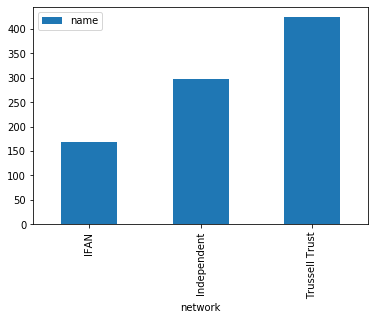

In [523]:
fb[["name","network"]].groupby("network").count().plot(kind="bar")

In [539]:
tar_fb = fb[fb["network"]=="IFAN"].copy()
tar_lo = lo.copy()
fig = go.Figure()

scatter_basic_points(tar_fb,tar_lo)

tq = tqdm(set(tar_lo["f_name"]))
for test_fb in tq:
    try:

        point_fb = tar_fb[tar_fb["name"]==test_fb].reset_index(drop=True)
        lo_list = tar_lo[tar_lo["f_name"]==test_fb]
        lo_list = lo_list.reset_index(drop=True)
        print(test_fb)
        for i in range(len(lo_list)):
            lngs = [point_fb.lng[0],lo_list["lng"][i]]
            lats = [point_fb.lat[0],lo_list["lat"][i]]
            Add_scatter(lngs,lats)
    except:
        pass

Aberdeen North
Shoreham
Hackney
West Berks
East Renfrewshire
Yiewsley & West Drayton
Gateshead
Warwick District
Brent
Burgess Hill
3food4u
North Belfast
Aston & Nechells
Central Southwark Community Hub
Epping Forest
North Norfolk
Dagenham
Wells Vineyard
Blaenau Gwent
Durham
Aylesbury
Weston-super-Mare
Northern Devon
Knowsley
Tameside South & Longdendale
Arden
Chelwood Foodbank Plus
Exeter
Wirral
Vale
Newark
Chichester District
Anglesey
Atherton & Leigh
South Ayrshire
Fylde
Lowestoft
Lincoln
Washington Community
Malmesbury & District
Bournemouth
Highland
Ledbury
St Austell
St Neots
Mustard Tree
Antrim
Abergele District
South Normanton Area
Glenrothes
Norwich
Cardiff
Leeds South & East
Banbury
Lutterworth and Villages
Hillingdon
Walton & Hersham
Perth and Kinross
Swindon
Gravesham
Uttlesford
Shepway
Chesterfield
Windermere & District
Caithness
Harrogate District
Newcastle West End
Deal Area
Basingstoke
Fareham & Gosport Basics Bank
Liskeard & Looe
Nuneaton
Rhondda
Bromley Borough
Redbrid

In [536]:
making_layout()
fig.show()

# Estimate legth of edge between foodbanks and locations

- estimate straight line

In [432]:
tq = tqdm(set(lo["f_name"]))
f_names = []
lo_names = []
distance_all = []

for test_fb in tq:
    print(test_fb)
    point_fb = fb[fb["name"]==test_fb].reset_index(drop=True)
    lo_list = lo[lo["f_name"]==test_fb]
    lo_list = lo_list.reset_index(drop=True)
    
    for i in range(len(lo_list)):
        fb_point = (point_fb.lng[0],point_fb.lat[0])
        lo_point = (lo_list["lng"][i],lo_list["lat"][i])
        f_names.append(test_fb)
        lo_names.append(lo_list["name"][i])
        distance_all.append(geopy.distance.geodesic(fb_point, lo_point).km)

Aberdeen North
Shoreham
Hackney
West Berks
East Renfrewshire
Yiewsley & West Drayton
Gateshead
Warwick District
Brent
Burgess Hill
3food4u
North Belfast
Aston & Nechells
Central Southwark Community Hub
Epping Forest
North Norfolk
Dagenham
Wells Vineyard
Blaenau Gwent
Durham
Aylesbury
Weston-super-Mare
Northern Devon
Knowsley
Tameside South & Longdendale
Arden
Chelwood Foodbank Plus
Exeter
Wirral
Vale
Newark
Chichester District
Anglesey
Atherton & Leigh
South Ayrshire
Fylde
Lowestoft
Lincoln
Washington Community
Malmesbury & District
Bournemouth
Highland
Ledbury
St Austell
St Neots
Mustard Tree
Antrim
Abergele District
South Normanton Area
Glenrothes
Norwich
Cardiff
Leeds South & East
Banbury
Lutterworth and Villages
Hillingdon
Walton & Hersham
Perth and Kinross
Swindon
Gravesham
Uttlesford
Shepway
Chesterfield
Windermere & District
Caithness
Harrogate District
Newcastle West End
Deal Area
Basingstoke
Fareham & Gosport Basics Bank
Liskeard & Looe
Nuneaton
Rhondda
Bromley Borough
Redbrid

In [467]:
dist_df = pd.DataFrame([f_names,lo_names,distance_all]).T.rename(columns={0:"foodbank",1:"locations",2:"distance(km)"})
dist_df

foodbank                               locations distance(km)
0      Aberdeen North                      Silver City Church       4.9874
1      Aberdeen North                             The Mission      2.49614
2      Aberdeen North                          Trinity Church      3.56681
3      Aberdeen North             Tillydrone Campus Foodstore      3.31429
4      Aberdeen North                                  CACHOP      4.49741
...               ...                                     ...          ...
1795  South Liverpool                Deeper Life Bible Church      7.18328
1796  South Liverpool                       Noah's Ark Centre      6.69915
1797  South Liverpool  Netherley Youth & Community Initiative      6.75738
1798    Malvern Hills                      The Lyttelton Well      2.86867
1799    Malvern Hills        Upton upon Severn Baptist Church      11.9369

[1800 rows x 3 columns]

In [440]:
dist_df[["foodbank","distance(km)"]].groupby("foodbank")#.mean()

In [468]:
dist_df["distance(km)"] = dist_df[["foodbank","distance(km)"]]["distance(km)"].map(lambda x: float(x))
dist_df

foodbank                               locations  distance(km)
0      Aberdeen North                      Silver City Church      4.987405
1      Aberdeen North                             The Mission      2.496137
2      Aberdeen North                          Trinity Church      3.566814
3      Aberdeen North             Tillydrone Campus Foodstore      3.314290
4      Aberdeen North                                  CACHOP      4.497408
...               ...                                     ...           ...
1795  South Liverpool                Deeper Life Bible Church      7.183282
1796  South Liverpool                       Noah's Ark Centre      6.699149
1797  South Liverpool  Netherley Youth & Community Initiative      6.757384
1798    Malvern Hills                      The Lyttelton Well      2.868667
1799    Malvern Hills        Upton upon Severn Baptist Church     11.936898

[1800 rows x 3 columns]

distance(km)
foodbank                             
3food4u                             7
Aberdeen North                      5
Aberdeenshire North                 4
Abergele District                   1
Abingdon                            1
...                               ...
Wokingham                           1
Wrexham                             6
Wythenshawe                         4
Yiewsley & West Drayton             2
York                                6

[291 rows x 1 columns]

In [511]:
dist_2 = dist_df[["foodbank","distance(km)"]].groupby("foodbank").mean().sort_values(by="distance(km)",ascending=False)
dist_3 = dist_df[["foodbank","distance(km)"]].groupby("foodbank").count()
dist_2 = pd.merge(dist_2,dist_3,on="foodbank").rename(columns={"distance(km)_x":"distance(km)","distance(km)_y":"count"})
dist_2.to_excel(r"C:\Users\Samsung\Desktop\all\Project\23_VRPTW\Data\GiveFood\EDA\esimating_edge_distance.xlsx")
dist_2

distance(km)  count
foodbank                                
Salvation Army         299.100122    608
Living Hope            115.083325      1
Highland                60.039588      6
Aberdeenshire North     53.777416      4
Caithness               50.451364      1
...                           ...    ...
Clay Cross               0.338678      1
Bicester                 0.224959      1
Deepings                 0.179597      1
Dad's House              0.018083      1
Launceston               0.000000      1

[291 rows x 2 columns]

In [471]:
dist_2["distance(km)"].mean()

9.671320745045827

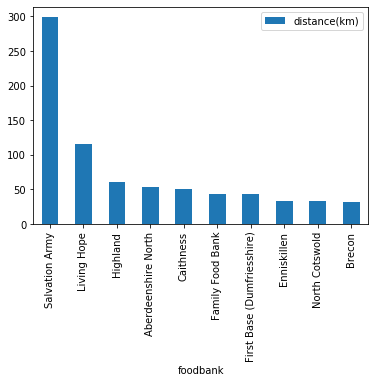

In [472]:
dist_2.iloc[0:10].plot(kind="bar")

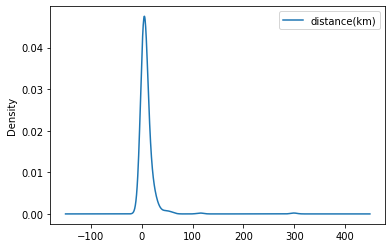

In [473]:
dist_2.plot(kind="density")

In [514]:
# Food bank linked with one point
dist_2[dist_2["count"]==1]

distance(km)  count
foodbank                              
Living Hope          115.083325      1
Caithness             50.451364      1
Brecon                31.763817      1
Liskeard & Looe       30.958896      1
Perth and Kinross     23.964762      1
...                         ...    ...
Clay Cross             0.338678      1
Bicester               0.224959      1
Deepings               0.179597      1
Dad's House            0.018083      1
Launceston             0.000000      1

[66 rows x 2 columns]

In [515]:
# Food bank 
dist_2.sort_values(by="distance(km)")

distance(km)  count
foodbank                                
Launceston               0.000000      1
Dad's House              0.018083      1
Deepings                 0.179597      1
Bicester                 0.224959      1
Clay Cross               0.338678      1
...                           ...    ...
Caithness               50.451364      1
Aberdeenshire North     53.777416      4
Highland                60.039588      6
Living Hope            115.083325      1
Salvation Army         299.100122    608

[291 rows x 2 columns]

### Inner salvation army 

In [480]:
dist_df[dist_df["foodbank"]=="Salvation Army"].mean()

distance(km)    299.100122
dtype: float64

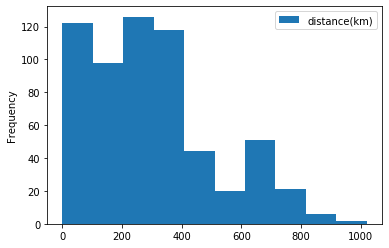

In [479]:
dist_df[dist_df["foodbank"]=="Salvation Army"].plot(kind="hist")

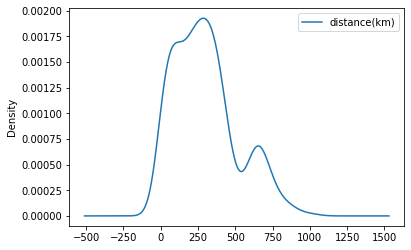

In [477]:
dist_df[dist_df["foodbank"]=="Salvation Army"].plot(kind="density")

In [ ]:
### 

# About Needs

In [402]:
fb.to_excel(r"C:\Users\Samsung\Desktop\all\Project\23_VRPTW\Data\GiveFood\AfterPrepro\foodbank.xlsx")
lo.to_excel(r"C:\Users\Samsung\Desktop\all\Project\23_VRPTW\Data\GiveFood\AfterPrepro\locations.xlsx")
need.to_excel(r"C:\Users\Samsung\Desktop\all\Project\23_VRPTW\Data\GiveFood\AfterPrepro\needs.xlsx")

In [409]:
lo[lo["f_name"]=="Salvation Army"].to_excel(r"C:\Users\Samsung\Desktop\all\Project\23_VRPTW\Data\GiveFood\AfterPrepro\SalvationOnly_locations.xlsx")

In [406]:
lo

name  \
0                     Cottonmill   
1            Merton Growbaby Hub   
2                        Catford   
3                    Hope Valley   
4                Emmanuel Chapel   
...                          ...   
1795                Winn Gardens   
1796  Nether Edge/Abbeydale Road   
1797             Open Doors Cafe   
1798               Bethnal Green   
1799              Garvagh Mobile   

                                                address  postcode  \
0     Cottonmill Community & Cycling Centre\r\n12 Ol...   AL1 2EF   
1                  42 Graham Road\r\nMitcham\r\nCR4 2HA   CR4 2HA   
2     Salvation Army Catford\r\n23 - 25 Brownhill Ro...   SE6 2HE   
3     St Helen's Church,\r\n1 Main Rd,\r\nGrindlefor...   S32 2JN   
4     Satchfield Crescent\r\nHenbury\r\nBristol\r\nB...  BS10 7BN   
...                                                 ...       ...   
1795  Winn Gardens TARA Building\r\n126 Winn Drive\r...    S6 1UD   
1796  Common Ground Community Centre\r\nSt Peters Ha...    S7 1GR   
1797  Bicester Methodist Church\r\nBell Lane\r\nBice...  OX26 6JQ   
1798  Raine's Foundation School\r\nApproach Road\r\n...    E2 9LY   
1799      Bridge Street Car Park\r\nGarvagh\r\nBT51 5AF  BT51 5AF   

                                               politics  \
0     {'parliamentary_constituency': 'St Albans', 'm...   
1     {'parliamentary_constituency': 'Mitcham and Mo...   
2     {'parliamentary_constituency': 'Lewisham East'...   
3     {'parliamentary_constituency': 'Derbyshire Dal...   
4     {'parliamentary_constituency': 'Bristol North ...   
...                                                 ...   
1795  {'parliamentary_constituency': 'Sheffield, Bri...   
1796  {'parliamentary_constituency': 'Sheffield Cent...   
1797  {'parliamentary_constituency': 'Banbury', 'mp'...   
1798  {'parliamentary_constituency': 'Bethnal Green ...   
1799  {'parliamentary_constituency': 'East Londonder...   

                      f_name         network                lat  \
0     St Albans and District  Trussell Trust         51.7384166   
1                  Wimbledon  Trussell Trust  51.41041870000001   
2                   Lewisham  Trussell Trust         51.4460211   
3               Chesterfield  Trussell Trust         53.2975772   
4         Bristol North West  Trussell Trust         51.5047201   
...                      ...             ...                ...   
1795            Sheffield S6  Trussell Trust  53.38112899999999   
1796            Sheffield S6  Trussell Trust         53.3597155   
1797                Bicester  Trussell Trust         51.8992651   
1798                     Bow     Independent          51.531354   
1799                Causeway  Trussell Trust         54.9836398   

                     lng  
0             -0.3312981  
1             -0.1592729  
2              -0.017136  
3             -1.6323329  
4             -2.6203455  
...                  ...  
1795           -1.470085  
1796          -1.4816056  
1797          -1.1514797  
1798          -0.0513275  
1799  -6.685834799999999  

[1800 rows x 8 columns]

In [411]:
fb[fb["name"]=="Salvation Army"]

name                                      address postcode  \
389  Salvation Army  101 Newington Causeway\r\nLondon\r\nSE1 6BN  SE1 6BN   

       parliamentary_constituency          mp mp_party     ward   district  \
389  Bermondsey and Old Southwark  Neil Coyle   Labour  Chaucer  Southwark   

     country charity_number  closed             latt_long      network  \
389  England         214779   False  51.4965956,-0.099385  Independent   

            lat        lng  lat1  lon1  
389  51.4965956  -0.099385   NaN   NaN

'St Albans and District'

In [ ]:


fig = go.Figure()
